In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Phân tích và xử lí dữ liệu**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu
data = pd.read_csv('/content/drive/MyDrive/Project_HM&UD/heart.csv')

# Hiển thị thông tin về dữ liệu
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
# Hiển thị 5 dòng đầu tiên của dữ liệu
print(data.head())

# Mô tả dữ liệu
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.0000

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.target.value_counts()

,count
target,
1,526
0,499


In [ ]:
# Kiểm tra các giá trị rỗng
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


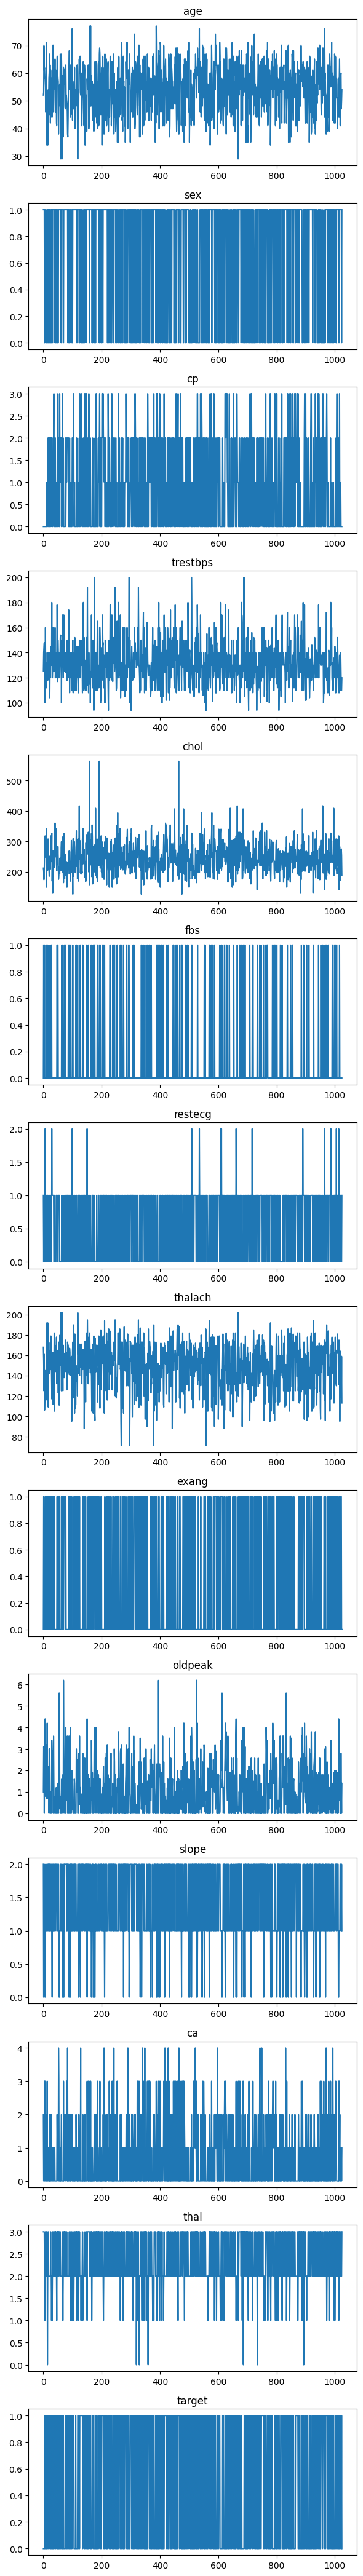

In [ ]:
# Thống kê theo từng thuộc tính
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(6, len(data.columns)*3))

for i, col in enumerate(data.columns):
    axes[i].plot(data[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

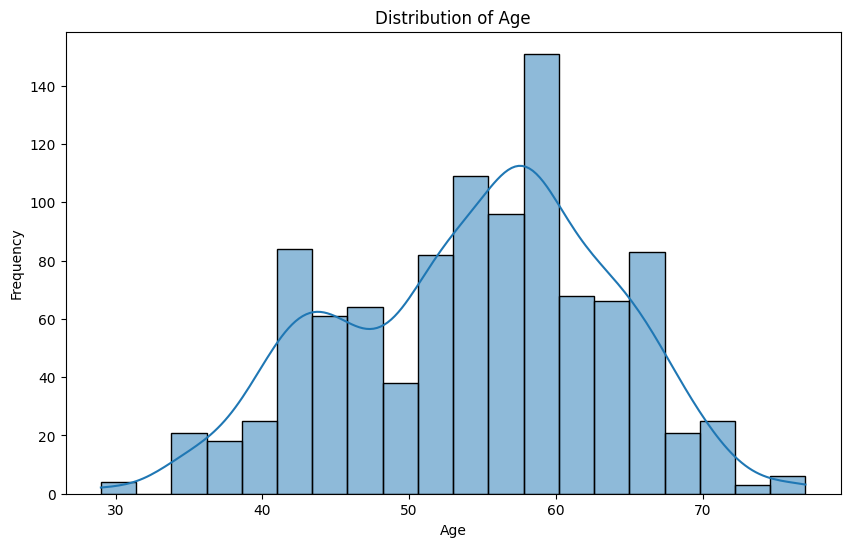

In [ ]:
# Bảng phân phối tuổi
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


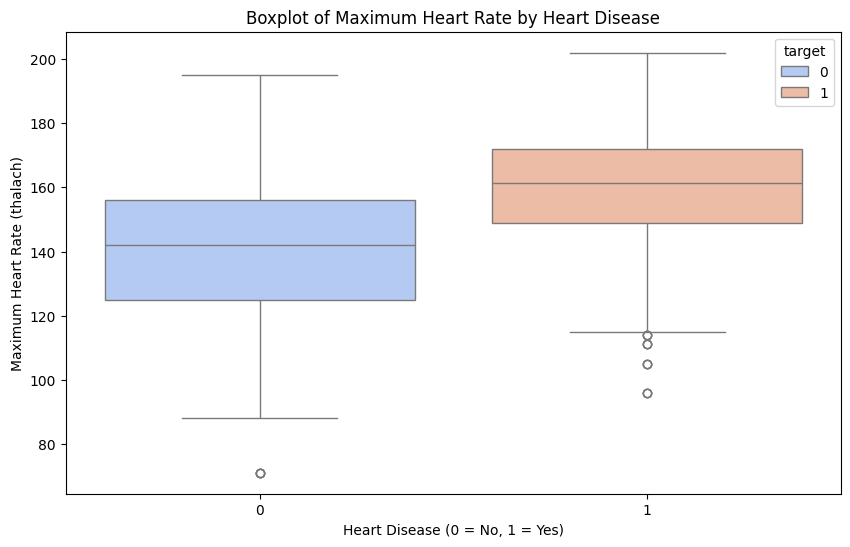

In [ ]:
# Boxplot cho thalach theo target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', hue='target', data=data, palette='coolwarm')
plt.title('Boxplot of Maximum Heart Rate by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()


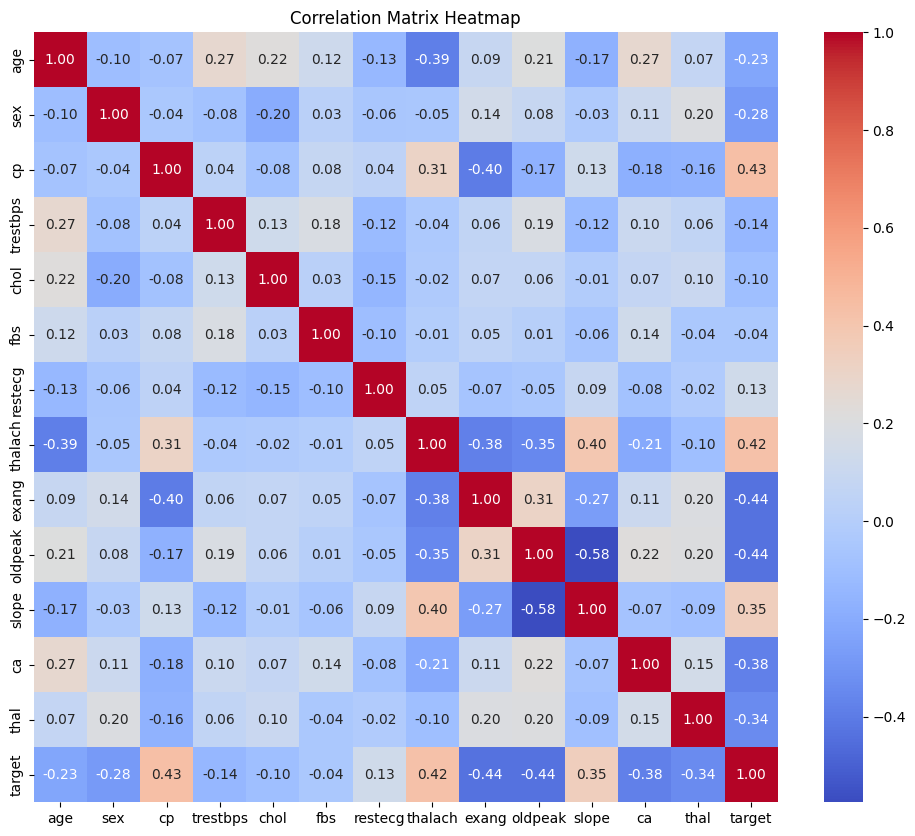

In [ ]:
# Trực quan hoá tương quan dữ liệu
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Các loại mô hình**

## **1. Logistic Regression**

In [ ]:
# Mô hình LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Chọn biến mục tiêu và biến đầu vào
X = data.drop(columns='target')
y = data['target']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình hồi quy Logistic
modelLR = LogisticRegression(max_iter=2000)
modelLR.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = modelLR.predict(X_test_scaled)

# Tính toán Accuracy của thuật toán
accuracy_lr = accuracy_score(y_test, y_pred_lr)


In [ ]:

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr))


Confusion Matrix:

[[73 29]
 [13 90]]


In [ ]:

# Độ chính xác hồi quy logistic
print(f"Logistic Regression accuracy: {accuracy_lr:.4f}")

# In ra báo cáo phân loại
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression accuracy: 0.7951
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## **2. Mô hình Gaussian Naive-Bayes**

In [ ]:
# Mô hình GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chọn biến mục tiêu và biến đầu vào
X = data.drop(columns='target')
y = data['target']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình hồi quy Logistic
modelGNB = GaussianNB()
modelGNB.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_GNB = modelGNB.predict(X_test_scaled)

# Tính toán Accuracy của thuật toán
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)


In [ ]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_GNB))

Confusion Matrix:

[[72 30]
 [11 92]]


In [ ]:

# Hiển thị kết quả
print(f"Gaussian Naive Bayes accuracy: {accuracy_GNB:.4f}")

# In ra báo cáo phân loại
print("Classification Report:\n")
print(classification_report(y_test, y_pred_GNB))

Gaussian Naive Bayes accuracy: 0.8000
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



## **3. Mô hình Decision Tree**

In [ ]:
# Mô hình DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chọn biến mục tiêu và biến đầu vào
X = data.drop(columns='target')
y = data['target']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình DecisionTreeClassifier
modelTree = DecisionTreeClassifier(random_state=42)
modelTree.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_Tree = modelTree.predict(X_test_scaled)

# Tính toán Accuracy của thuật toán
accuracy_Tree = accuracy_score(y_test, y_pred_Tree)

In [ ]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_Tree))

Confusion Matrix:

[[102   0]
 [  3 100]]


In [ ]:

# Hiển thị kết quả
print(f"Gaussian Naive Bayes accuracy: {accuracy_GNB:.4f}")

# In ra báo cáo phân loại
print("Classification Report:\n")
print(classification_report(y_test, y_pred_Tree))

Gaussian Naive Bayes accuracy: 0.8000
Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **So sánh độ chính xác của các mô hình**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Khởi tạo và huấn luyện các mô hình
logistic_model = LogisticRegression()
gaussian_nb_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()

logistic_model.fit(X_train_scaled, y_train)
gaussian_nb_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)

# Dự đoán và tính các chỉ số đánh giá
models = {
    'Logistic Regression': logistic_model,
    'Gaussian Naive Bayes': gaussian_nb_model,
    'Decision Tree': decision_tree_model
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

results = {metric: [] for metric in metrics}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    for metric_name, metric in metrics.items():
        if metric_name == 'Accuracy':
            score = metric(y_test, y_pred)  # Bỏ qua zero_division cho accuracy_score
        else:
            score = metric(y_test, y_pred, zero_division=0)
        results[metric_name].append(score)

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results, index=models.keys())

# Tạo từng bảng cho mỗi chỉ số
accuracy_df = results_df[['Accuracy']]
precision_df = results_df[['Precision']]
recall_df = results_df[['Recall']]
f1_score_df = results_df[['F1 Score']]

# Tạo một dictionary cho tên viết tắt của mô hình
abbreviations = {
    'Logistic Regression': 'LR',
    'Gaussian Naive Bayes': 'GNB',
    'Decision Tree': 'DT'
}


## **So sánh Accuracy**

Accuracy:
                      Accuracy
Logistic Regression   0.795122
Gaussian Naive Bayes  0.800000
Decision Tree         0.985366 



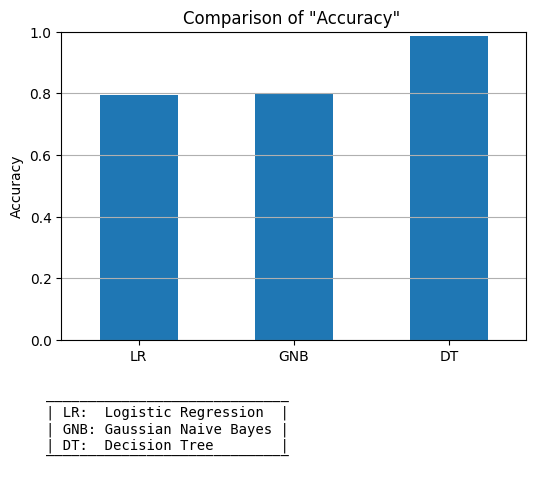

In [ ]:
# In ra bảng Accuracy
print("Accuracy:")
print(accuracy_df, "\n")

# Vẽ biểu đồ cho chỉ số Accuracy
accuracy_df.plot(kind='bar', figsize=(6, 4), legend=False)
plt.title('Comparison of "Accuracy" ')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(accuracy_df.index)), labels=[abbreviations[name] for name in accuracy_df.index], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')

# Thêm chú thích bên trái
plt.figtext(0.1, -0.2,
                '_____________________________\n'
                '| LR:  Logistic Regression  |\n'
                '| GNB: Gaussian Naive Bayes |\n'
                '| DT:  Decision Tree        |\n'
                '‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾',
            wrap=True, horizontalalignment='left', fontsize=10, family='monospace')

plt.show()

## **So sánh Precision**

Precision:
                      Precision
Logistic Regression    0.756303
Gaussian Naive Bayes   0.754098
Decision Tree          1.000000 



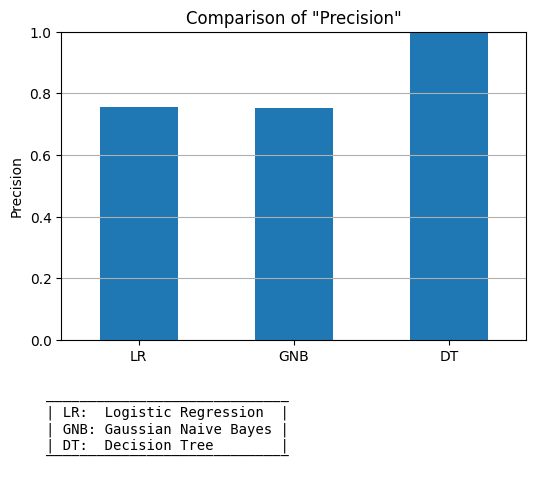

In [ ]:
# In ra bảng Precision
print("Precision:")
print(precision_df, "\n")

# Vẽ biểu đồ cho chỉ số Precision
precision_df.plot(kind='bar', figsize=(6, 4), legend=False)
plt.title('Comparison of "Precision"')
plt.ylabel('Precision')
plt.xticks(ticks=range(len(precision_df.index)), labels=[abbreviations[name] for name in precision_df.index], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')

# Thêm chú thích bên trái
plt.figtext(0.1, -0.2,
                '_____________________________\n'
                '| LR:  Logistic Regression  |\n'
                '| GNB: Gaussian Naive Bayes |\n'
                '| DT:  Decision Tree        |\n'
                '‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾',
            wrap=True, horizontalalignment='left', fontsize=10, family='monospace')

plt.show()

## **So sánh Recall**

Recall:
                        Recall
Logistic Regression   0.873786
Gaussian Naive Bayes  0.893204
Decision Tree         0.970874 



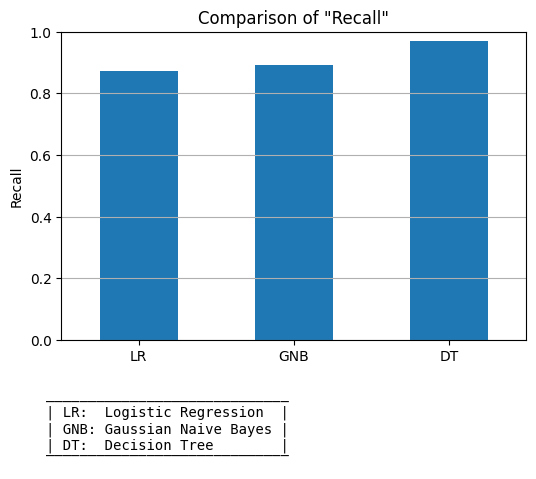

In [ ]:
# In ra bảng Recall
print("Recall:")
print(recall_df, "\n")

# Vẽ biểu đồ cho chỉ số Recall
recall_df.plot(kind='bar', figsize=(6, 4), legend=False)
plt.title('Comparison of "Recall"')
plt.ylabel('Recall')
plt.xticks(ticks=range(len(recall_df.index)), labels=[abbreviations[name] for name in recall_df.index], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')

# Thêm chú thích bên trái
plt.figtext(0.1, -0.2,
                '_____________________________\n'
                '| LR:  Logistic Regression  |\n'
                '| GNB: Gaussian Naive Bayes |\n'
                '| DT:  Decision Tree        |\n'
                '‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾',
            wrap=True, horizontalalignment='left', fontsize=10, family='monospace')

plt.show()

## **So sánh F1 Score**

F1 Score:
                      F1 Score
Logistic Regression   0.810811
Gaussian Naive Bayes  0.817778
Decision Tree         0.985222 



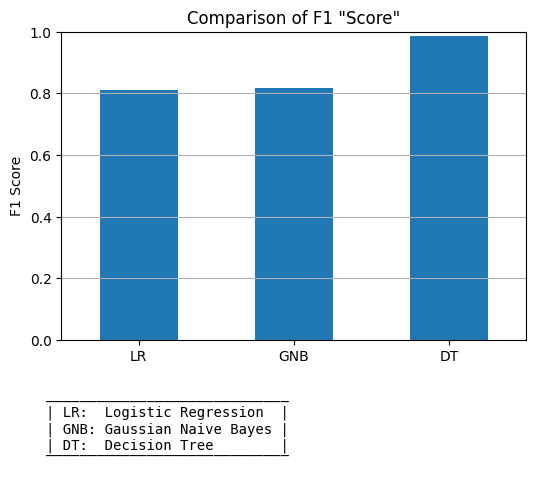

In [ ]:
# In ra bảng F1 Score
print("F1 Score:")
print(f1_score_df, "\n")

# Vẽ biểu đồ cho chỉ số F1 Score
f1_score_df.plot(kind='bar', figsize=(6, 4), legend=False)
plt.title('Comparison of F1 "Score"')
plt.ylabel('F1 Score')
plt.xticks(ticks=range(len(f1_score_df.index)), labels=[abbreviations[name] for name in f1_score_df.index], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')

# Thêm chú thích bên trái
plt.figtext(0.1, -0.2,
                '_____________________________\n'
                '| LR:  Logistic Regression  |\n'
                '| GNB: Gaussian Naive Bayes |\n'
                '| DT:  Decision Tree        |\n'
                '‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾',
            wrap=True, horizontalalignment='left', fontsize=10, family='monospace')

plt.show()

# **Dự đoán kết quả bằng các mô hình**

In [ ]:
# Dữ liệu mẫu mới cần dự đoán
benh = [[58, 0, 0, 100, 248, 0, 0, 122, 0, 1, 1, 0, 2]]
khongBenh = [[58, 1, 0, 114, 318, 0, 2, 140, 0, 4.4, 0, 3, 1]]

## **LogisticRegression**

In [ ]:

# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(benh)

# Dự đoán kết quả bằng mô hình LogisticRegression
ketqua = modelLR.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Bị bệnh tim


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:


# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(khongBenh)

# Dự đoán kết quả bằng mô hình LogisticRegression
ketqua = modelLR.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Khỏe mạnh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Gaussian Naive-Bayes**

In [ ]:

# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(benh)

# Dự đoán kết quả bằng mô hình Gaussian Naive-Bayes
ketqua = modelGNB.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Bị bệnh tim


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(khongBenh)

# Dự đoán kết quả bằng mô hình Gaussian Naive-Bayes
ketqua = modelGNB.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Khỏe mạnh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Decision Tree**

In [ ]:

# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(benh)

# Dự đoán kết quả bằng mô hình Decision Tree
ketqua = modelTree.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Bị bệnh tim


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

# Chuẩn hóa dữ liệu đầu vào
a_scaled = scaler.transform(khongBenh)

# Dự đoán kết quả bằng mô hình Decision Tree
ketqua = modelTree.predict(a_scaled)

# Hiển thị kết quả
if ketqua == [0]:
    print('Khỏe mạnh')
else:
    print('Bị bệnh tim')


Khỏe mạnh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
